# Partially Linear Fast-Reaction System 4

In [1]:
using TUMProject
using DifferentialEquations

### Define grid

In [2]:
r = 50
n = (2*r + 1)
N = n^2
grid = uniform2dgrid(-r:r,-r:r)
operator = laplace2dpbc(grid)  

Laplace Operator with periodic boundary condtions


### Set up initial condtions

In [3]:
u0 = zeros(Float64, (n,n))
v0 = zeros(Float64, (n,n))
u0[r:2*r-1,r:2*r-1] .= 1f0
u0[3:r,3:r] .= 1f0
v0[2:2*r-1,r+1:2*r-1] .= 1f0;
#plotinitialconditions(u0, v0, "u0", "v0")

### Let us try a non polynomial nonlinearity in v in f

In [4]:
D_u = 200.5
D_v = 100.4
g(u,v) = 2*u - 3*v 
eps = 0.5
f(u,v) = -u + cos(10*v) - v^3
h(v) = cos(10*v) - v^3
system = fastreactionsystem(operator, f, g, D_u, D_v, eps)
limitsystem = fastreactionlimitsystem(operator, h, g, D_v)

Limit System of Fast-Reaction-System


In [5]:
tol = 0.2e-1
T_max = 2.0
tspan = (0.0, T_max)
limitprob = ODEProblem(limitsystem, reshape(v0, :) , tspan, N)
limitsol = solve(limitprob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 479-element Vector{Float64}:
 0.0
 3.933719786833544e-8
 4.327091765516898e-7
 4.3664289633852335e-6
 4.370362683172066e-5
 0.00028024762617407436
 0.0008307470973863985
 0.0017026153423418693
 0.002901790004457722
 0.004594852833367327
 0.006891085951877665
 0.01002812852340524
 0.014255033376896584
 ⋮
 1.9568907528631263
 1.9611398048096287
 1.965388856587289
 1.969637908196107
 1.9738869593546795
 1.97813601034441
 1.9823850611652982
 1.9866341118173443
 1.990883162019145
 1.9951322120521033
 1.9993812616348163
 2.0
u: 479-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [7.867439109441751e-8, 7.86743911046848e-8, 7.867439110468482e-8, 7.867439110468482e-8, 7.867439110468482e-8, 7.867439110468482e-8, 7.867439110468482e-8, 7.867439110468482e-8, 7.867439110468482e-8, 7.867439110468482e-8  …  7.868219013765903e-8, 7.8682

In [6]:
ts = tspan[1]:0.01:tspan[2]
ulimit(t) = reshape( h.(limitsol(t)), n, n )
vlimit(t) = reshape( limitsol(t), n, n )
#animatesystem( ulimit, vlimit ,"ulimit", "vlimit", ts, [0, 1], "partiallylinearlimitsystem4", 15.0)

vlimit (generic function with 1 method)

In [7]:
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 925-element Vector{Float64}:
 0.0
 2.2539103570815722e-8
 2.4793013927897295e-7
 2.501840496360545e-6
 2.5040944067176265e-5
 0.000140760252367101
 0.00036176574880159745
 0.0006821626883975411
 0.0011367271891152186
 0.001778123317001828
 0.002661061330756819
 0.0037973426893152607
 0.0054357935390937275
 ⋮
 1.9775465405757122
 1.979730843122324
 1.9819151431229114
 1.9840994405774774
 1.986283735630685
 1.988468028282537
 1.9906523185330358
 1.992836606382184
 1.9950208916853251
 1.9972051744424621
 1.9993894547982567
 2.0
u: 925-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [4.507820612560918e-8, 4.507820617175322e-8, 4.508841709051281e-8, 4.508841713665687e-8, 4.5088417136656984e-8, 4.5088417136656984e-8, 4.5088417136656984e-8, 4.5088417136656984e-8, 4.5088417136656984e-8, 4.5088417136656984e-8  …  2.5614234986135

In [8]:
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)
#animatesystem( u, v ,"u","v", ts, [0.0, 1.0], "partiallylinearsystem4a", 15.0 )

v (generic function with 1 method)

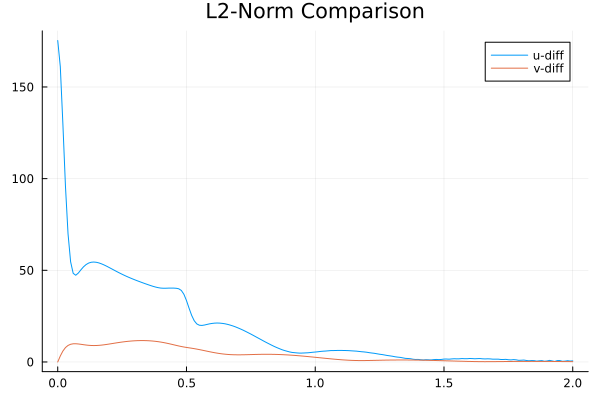

In [9]:
plotcomparenorms(u, ulimit, v, vlimit, 2.0, ts, "u-diff", "v-diff")

In [10]:
eps = 0.1
system = fastreactionsystem(operator, f, g, D_u, D_v, eps)
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 929-element Vector{Float64}:
 0.0
 2.1734140439696106e-8
 2.390755448366572e-7
 2.412489588806268e-6
 2.414663002850237e-5
 0.00014434440105412486
 0.00037487918817876494
 0.0007220391177280695
 0.0012235683990369248
 0.0019296285130959959
 0.0028523892865542286
 0.004140437303217536
 0.005681823893989598
 ⋮
 1.9761941368235085
 1.978367755788432
 1.9805413745230307
 1.9827149931712575
 1.9848886117331124
 1.9870622302085954
 1.9892358485977066
 1.9914094671883522
 1.993583085692626
 1.995756704110528
 1.997930322729964
 2.0
u: 929-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [2.1734138077831974e-7, 2.1734138081969434e-7, 2.1735087541946887e-7, 2.1735087546084336e-7, 2.173508754608434e-7, 2.173508754608434e-7, 2.173508754608434e-7, 2.173508754608434e-7, 2.173508754608434e-7, 2.173508754608434e-7  …  2.385512162831086

In [11]:
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)
#animatesystem( u, v ,"u","v", ts, [0.0, 1.0], "partiallylinearsystem4b", 15.0 )

v (generic function with 1 method)

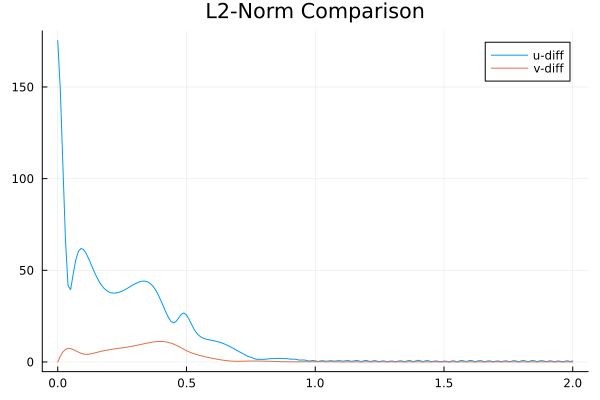

In [12]:
plotcomparenorms(u, ulimit, v, vlimit, 2.0, ts, "u-diff", "v-diff")

In [13]:
eps = 0.01
system = fastreactionsystem(operator, f, g, D_u, D_v, eps)
prob = ODEProblem(system, [ reshape(u0, :); reshape(v0, :) ], tspan, N)
sol = solve(prob, Tsit5(), reltol=tol, abstol=1e-6*tol)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 980-element Vector{Float64}:
 0.0
 8.485077799581481e-9
 9.33358557953963e-8
 9.418436357535444e-7
 9.426921435335025e-6
 9.427769943114983e-5
 0.0002994620556577083
 0.0006447951509588122
 0.0011778994107927026
 0.001934340189329514
 0.0029405849579085537
 0.004189419121784004
 0.005734327420247109
 ⋮
 1.9780388714254098
 1.9801000077735398
 1.982161144312775
 1.9842222807701078
 1.9862834171455386
 1.9883445534390671
 1.9904056899237008
 1.9924668265994396
 1.9945279631932762
 1.996589099568707
 1.9986502358622356
 2.0
u: 980-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [8.485074199755233e-7, 8.485074199779853e-7, 8.485088671072898e-7, 8.485088671097518e-7, 8.485088671097518e-7, 8.485088671097518e-7, 8.485088671097518e-7, 8.485088671097518e-7, 8.485088671097518e-7, 8.485088671097518e-7  …  3.7006749017576855e-13, 3

In [14]:
u(t) = reshape( sol(t)[1:N], n, n)
v(t) = reshape( sol(t)[N+1:2N], n, n)
#animatesystem( u, v ,"u","v", ts, [0.0, 1.0], "partiallylinearsystem4c", 15.0 )

v (generic function with 1 method)

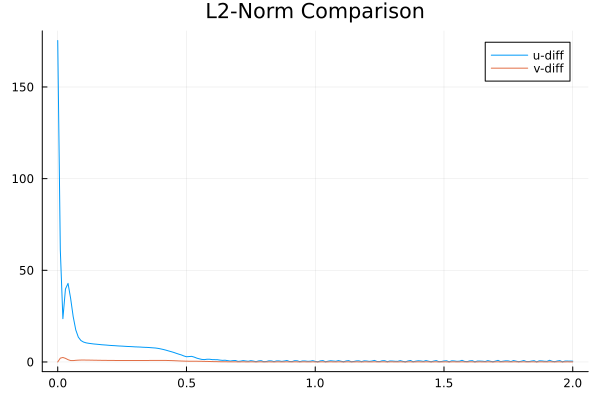

In [15]:
plotcomparenorms(u, ulimit, v, vlimit, 2.0, ts, "u-diff", "v-diff")